In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report


In [2]:
diabetes = load_diabetes()
df_uci = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_uci['target'] = diabetes.target

print("✅ UCI Diabetes Dataset Loaded")
print(df_uci.head())
print("\nDataset Info:")
print(df_uci.info())
print("\nSummary Statistics:")
print(df_uci.describe())



✅ UCI Diabetes Dataset Loaded
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64

In [3]:
df_pima=pd.read_csv('pima_diabetes.csv')
print(df_pima.head())
print("\nSummary Statistics:")
print(df_pima.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.

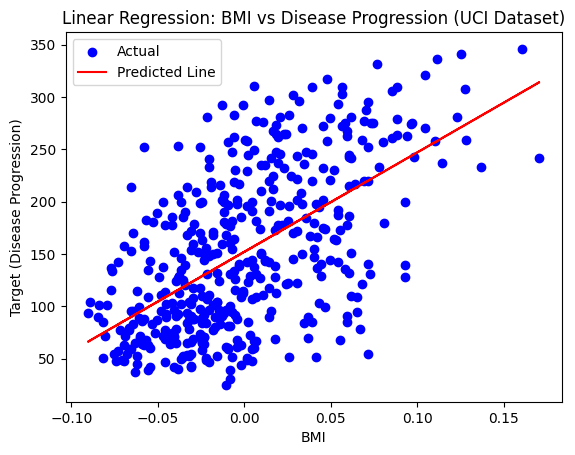

R2 Score (UCI Linear): 0.344
MSE (UCI Linear): 3890.457


In [5]:
# Bivariate Analysis (UCI) – Linear Regression 
X = df_uci[['bmi']]
y = df_uci['target']

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted Line')
plt.title("Linear Regression: BMI vs Disease Progression (UCI Dataset)")
plt.xlabel("BMI")
plt.ylabel("Target (Disease Progression)")
plt.legend()
plt.show()

print(f"R2 Score (UCI Linear): {r2_score(y, y_pred):.3f}")
print(f"MSE (UCI Linear): {mean_squared_error(y, y_pred):.3f}")


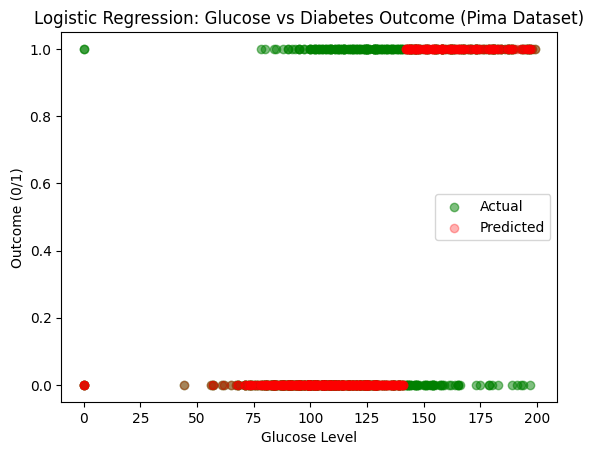

Accuracy (Pima Logistic): 0.746

Confusion Matrix:
 [[443  57]
 [138 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       500
           1       0.70      0.49      0.57       268

    accuracy                           0.75       768
   macro avg       0.73      0.69      0.70       768
weighted avg       0.74      0.75      0.73       768



In [6]:
#  Bivariate Analysis (Pima) – Logistic Regression 
X = df_pima[['Glucose']]
y = df_pima['Outcome']

logr = LogisticRegression()
logr.fit(X, y)
y_pred = logr.predict(X)

plt.scatter(X, y, color='green', alpha=0.5, label='Actual')
plt.scatter(X, y_pred, color='red', alpha=0.3, label='Predicted')
plt.title("Logistic Regression: Glucose vs Diabetes Outcome (Pima Dataset)")
plt.xlabel("Glucose Level")
plt.ylabel("Outcome (0/1)")
plt.legend()
plt.show()

print(f"Accuracy (Pima Logistic): {accuracy_score(y, y_pred):.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

In [7]:
# Multiple Regression (UCI)
X = df_uci.drop('target', axis=1)
y = df_uci['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)
y_pred = multi_lr.predict(X_test)

print("\n📊 Multiple Regression (UCI):")
print(f"R2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")



📊 Multiple Regression (UCI):
R2 Score: 0.453
MSE: 2900.194


In [8]:
#  Multiple Regression (Pima)
X = df_pima.drop('Outcome', axis=1)
y = df_pima['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_logr = LogisticRegression(max_iter=200)
multi_logr.fit(X_train, y_train)
y_pred = multi_logr.predict(X_test)

print("\n📊 Multiple Logistic Regression (Pima):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



📊 Multiple Logistic Regression (Pima):
Accuracy: 0.747
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [9]:
# Comparison Summary 
print("\n✅ Comparison Summary:")
print(f"UCI Dataset → Linear R²: {r2_score(df_uci['target'], lr.predict(df_uci[['bmi']])):.3f}")
print(f"Pima Dataset → Logistic Accuracy: {accuracy_score(df_pima['Outcome'], logr.predict(df_pima[['Glucose']])):.3f}")
print("UCI Multiple Regression vs Pima Logistic Regression:")
print(f"UCI R²: {r2_score(y_test, y_pred):.3f}  |  Pima Accuracy: {accuracy_score(y_test, y_pred):.3f}")


✅ Comparison Summary:
UCI Dataset → Linear R²: 0.344
Pima Dataset → Logistic Accuracy: 0.746
UCI Multiple Regression vs Pima Logistic Regression:
UCI R²: -0.103  |  Pima Accuracy: 0.747
